In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram
import copy
from sklearn.metrics.pairwise import linear_kernel
from sklearn.decomposition import PCA, TruncatedSVD
import cPickle as pickle

In [34]:
with open('tfidf.dat', 'rb') as infile:
    X = pickle.load(infile)

In [169]:
cluster = pd.read_csv('clustering.csv')

In [185]:
columns = list(cluster.columns)
columns[0] = 'bookid'
columns[-4:] = ['darwin', 'chance_and_luck', 'euclid', 'short_hist_math']
cluster.columns = columns
cluster = cluster.sort_values(by = 'bookid')

In [186]:
columns[-4:]

['darwin', 'chance_and_luck', 'euclid', 'short_hist_math']

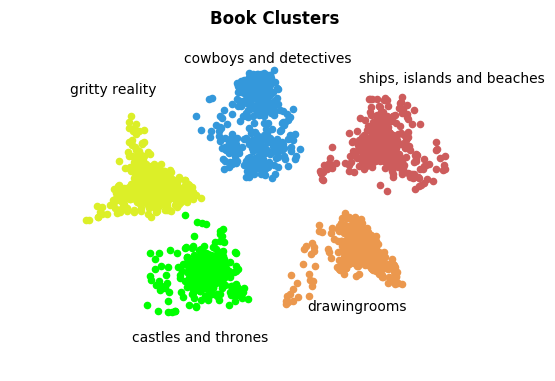

In [229]:
title = 'Book Clusters'
threshold = 0.1

fig = plt.figure()
fig.suptitle(title, fontsize=12, fontweight='bold')

ax = fig.add_subplot(111)

cluster_range = xrange(0,5)

for i in cluster_range:
    rows = (assignment.values == i)
    color_map = ['#3498DB', '#CD5C5C', '#00FF00', '#EB984E', '#DCEF28']
    offset = [[1,1], [2.25,1], [0.5, -0.25], [2,0], [0,0.6]]   
    
    labels = ['cowboys and detectives', 'ships, islands and beaches', 'castles and thrones', 'drawingrooms', 'gritty reality']
    label_positions = [[0.3,1.8], [2,1.6], [-0.2, -.9], [1.5,-0.6], [-0.8,1.5]] 
    
    pca = PCA(n_components = 2)
    pca.fit(X[rows,:])
    
    X_2d = pca.transform(X)
    X_2d[:,0] = X_2d[:,0] + offset[i][0]
    X_2d[:,1] = X_2d[:,1] + offset[i][1]
    
    term = cluster.machine.values
    X_binary = X_2d[(term > threshold),:]
    X_binary_zero = X_2d[(term <= threshold),:]
    
    ### for binary
    #plt.scatter(X_binary_zero[:,0], X_binary_zero[:,1], color = '0.75') # show binary
    #plt.scatter(X_binary[:,0], X_binary[:,1], color = 'k') # show binary

    ### for normal clusters
    plt.scatter(X_2d[:,0], X_2d[:,1], color = color_map[i]) # one color for each cluster
    ax.text(label_positions[i][0], label_positions[i][1], labels[i])


plt.axis('off')
plt.show()

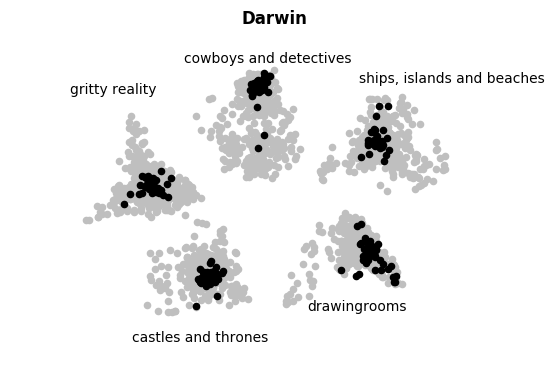

In [222]:
title = 'Darwin'
threshold = 0.1

fig = plt.figure()
fig.suptitle(title, fontsize=12, fontweight='bold')

ax = fig.add_subplot(111)

cluster_range = xrange(0,5)

for i in cluster_range:
    rows = (assignment.values == i)
    color_map = ['b', 'g', 'r', 'c', 'y']
    offset = [[1,1], [2.25,1], [0.5, -0.25], [2,0], [0,0.6]]   
    
    labels = ['cowboys and detectives', 'ships, islands and beaches', 'castles and thrones', 'drawingrooms', 'gritty reality']
    label_positions = [[0.3,1.8], [2,1.6], [-0.2, -.9], [1.5,-0.6], [-0.8,1.5]] 

    pca = PCA(n_components = 2)
    pca.fit(X[rows,:])
    
    X_2d = pca.transform(X)
    X_2d[:,0] = X_2d[:,0] + offset[i][0]
    X_2d[:,1] = X_2d[:,1] + offset[i][1]
    
    term = cluster.darwin.values
    X_binary = X_2d[(term > threshold),:]
    X_binary_zero = X_2d[(term <= threshold),:]
    
    ### for binary
    plt.scatter(X_binary_zero[:,0], X_binary_zero[:,1], color = '0.75') # show binary
    plt.scatter(X_binary[:,0], X_binary[:,1], color = 'k') # show binary

    ### for normal clusters
    #plt.scatter(X_2d[:,0], X_2d[:,1], color = color_map[i]) # one color for each cluster
    
    ax.text(label_positions[i][0], label_positions[i][1], labels[i])


plt.axis('off')
plt.show()

In [200]:
by_year = cluster.pivot_table(index='year_range', columns='cluster_5', values='year', aggfunc= 'count')

by_year = by_year.reset_index().iloc[0:-2,:]

by_year = by_year.fillna(0)

by_year['total'] = by_year[0] + by_year[1] + by_year[2] + by_year[3] + by_year[4]

by_year

cluster_5,year_range,0,1,2,3,4,total
0,1800,1.0,4.0,7.0,18.0,0.0,30.0
1,1850,10.0,13.0,15.0,28.0,1.0,67.0
2,1860,11.0,2.0,9.0,22.0,3.0,47.0
3,1870,7.0,2.0,12.0,25.0,3.0,49.0
4,1880,11.0,5.0,11.0,30.0,5.0,62.0
5,1890,17.0,17.0,10.0,33.0,9.0,86.0
6,1900,26.0,41.0,16.0,40.0,38.0,161.0
7,1910,36.0,39.0,29.0,48.0,74.0,226.0
8,1920,60.0,44.0,42.0,36.0,94.0,276.0
9,1930,15.0,14.0,10.0,12.0,32.0,83.0


/Users/nicholashalpern/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


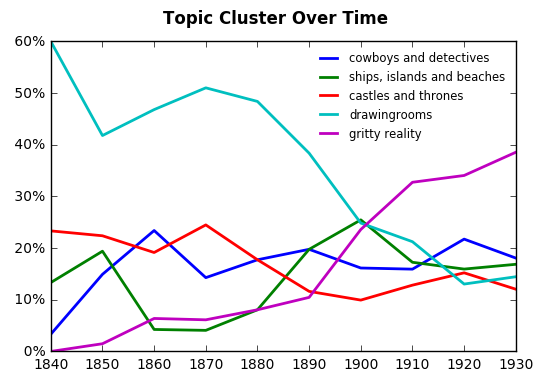

In [218]:
title = 'Topic Cluster Over Time'

fig = plt.figure()
fig.suptitle(title, fontsize=12, fontweight='bold')

ax = fig.add_subplot(111)

cluster_range = xrange(0,5)

by_year.year_range[0] = 1840
for x in xrange(0,5):
    plt.plot(by_year.year_range, by_year[x]/by_year['total'], label = labels[x], linewidth = 2)


vals = ax.get_yticks()
ax.set_yticklabels(['{:3.0f}%'.format(x*100) for x in vals])

plt.legend(labels, fontsize = 'small', frameon = False)    
plt.show()

In [230]:
by_year

cluster_5,year_range,0,1,2,3,4,total
0,1840,1.0,4.0,7.0,18.0,0.0,30.0
1,1850,10.0,13.0,15.0,28.0,1.0,67.0
2,1860,11.0,2.0,9.0,22.0,3.0,47.0
3,1870,7.0,2.0,12.0,25.0,3.0,49.0
4,1880,11.0,5.0,11.0,30.0,5.0,62.0
5,1890,17.0,17.0,10.0,33.0,9.0,86.0
6,1900,26.0,41.0,16.0,40.0,38.0,161.0
7,1910,36.0,39.0,29.0,48.0,74.0,226.0
8,1920,60.0,44.0,42.0,36.0,94.0,276.0
9,1930,15.0,14.0,10.0,12.0,32.0,83.0


In [238]:
over_time = 

,bookid,author,book_title,nationality,strength,subject,year,year_range,cluster_5,farm,...,democracy,poetry,Charity (practice),capitalism,country,darwin,chance_and_luck,euclid,short_hist_math,darwin_binary
0,0,A. A. Milne,The Sunny Side,British,0.238374,novel,1921,1930,4,0.038873,...,0.027275,0.049200,0.010162,0.034561,0.016147,0.039987,0.119977,0.007394,0.088964,False
1,1,A. A. Milne,Second Plays,British,0.059623,ebooks-unzipped/chance_and_luck.tex,1921,1930,4,0.015928,...,0.016154,0.045898,0.019902,0.014650,0.011164,0.011294,0.059623,0.005017,0.034986,False
2,2,A. A. Milne,The Red House Mystery,British,0.090507,sailor,1922,1930,0,0.004573,...,0.031099,0.011328,0.010404,0.044159,0.000000,0.003826,0.021193,0.000807,0.012897,False
3,3,A. A. Milne,Once on a Time,British,0.199713,poetry,1917,1920,4,0.025832,...,0.042707,0.199713,0.007516,0.026070,0.028657,0.017307,0.127565,0.007270,0.110481,False
4,4,A. A. Milne,The Holiday Round,British,0.130193,ebooks-unzipped/chance_and_luck.tex,1912,1920,4,0.053136,...,0.030118,0.009175,0.011488,0.036495,0.011774,0.017594,0.130193,0.026107,0.072926,False


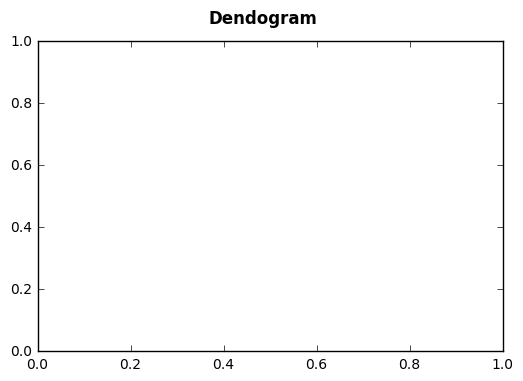

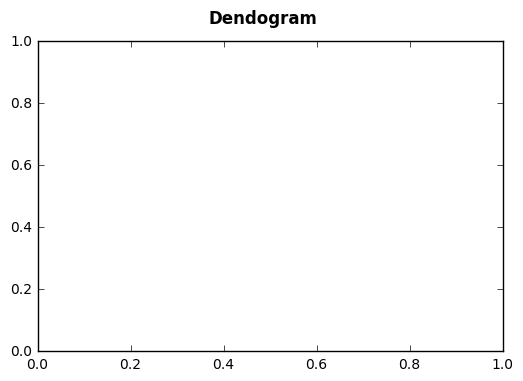

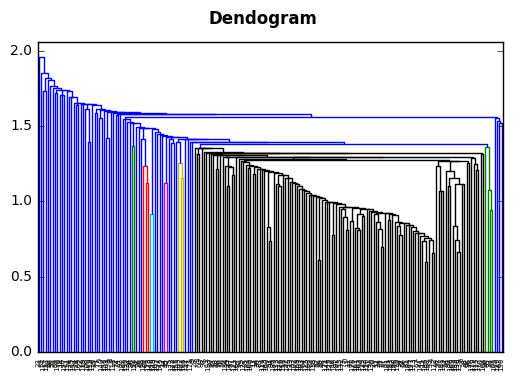

In [245]:
title = 'Dendogram'

fig = plt.figure()
fig.suptitle(title, fontsize=12, fontweight='bold')

ax = fig.add_subplot(111)

cluster_range = xrange(0,1)

for i in cluster_range:
    rows = (assignment.values == i)
    square_distance = squareform(pdist(X[rows,:]))
    dendo = dendrogram(linkage(square_distance))
    plt.show()